# Signal and Image Processing (SIP SS25)

### Research Group Neuroinformatics, Faculty of Computer Science,
### University of Vienna


###  DFT Tutorial

Lecturer: Prof. Moritz GROSSE-WENTRUP

Tutorial by: Sadiq A. ADEDAYO
$\quad\quad\quad\quad$ Jakob PRAGER 
$\quad\quad\quad\quad$ Kerim ATAK (kerim.atak@univie.ac.at)

In [24]:
# imports packages required (Numpy and Matplotlib)

import numpy as np
import matplotlib.pyplot as plt

## Discrete Fourier Transform (DFT)

You learned about analysis (DFT) and synthesis (iDFT) from the video lectures. We have introduced that DFT allows us to change the domain of a signal from time to frequency while iDFT does the reverse. 

In this exercise, we will implement this and see how the concept works.

Recall,

Discrete Fourier Transform (Analysis); $$X(k) = \sum_{n=0}^{N-1} x[n] \exp \left( {-j.\frac{ 2\pi k}{N}. n} \right)$$


inverse Discrete Fourier Transform (Synthesis); $$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X(k) \exp \left( {j.\frac{ 2\pi k}{N}. n} \right)$$

### Trigonometric signals

Before we dive into DFT, it is important to understand the concept of signal oscillations.


Take for instance, a sine signal as defined by;
$$ x[n] = A sin\left( \frac{2 \pi k}{N}. n  \right) $$

where

- A is the amplitude
- k is the frequency of oscillations per second measure in $s^{-1}$ or Hz (assuming, the signal is 1s long).

Intuitively, k is the number of complete periods within N. i.e. if the signal is 1 second long, then k is the frequency.
- N is the signal length. Mathematically; N = $f_{s}$ * T  where $f_{s}$ and `T` are the sampling frequency and length of the signal in [sec] respectively.

$$x[n] = A sin \left(\frac{2 \pi k}{f_{s} T} \cdot n \right)$$

When N = $f_{s}$ * T and T = 1, the formular then becomes;

$$x[n] = A sin \left(\frac{2 \pi k}{f_{s}} \cdot n \right)$$


Oftentimes, Amplitude `A` is not given in the signal equation, this indicates that it is unity (1). Hence

$$x[n] = sin\left( \frac{2 \pi k}{f_{s}} \cdot n  \right)$$

In [25]:
# plot sine signals

def plot_signal(s, label = 's[n]'):
    fig = plt.figure(figsize=(10, 5))
    # if s is array of arrays
    if isinstance(s[0], np.ndarray):
        for (si, li) in zip(s, label):   
            plt.plot(si, label=li)
    else:
        plt.plot(s, label=label)
    plt.grid()
    plt.xlabel('n')
    plt.legend()
    plt.show()

In [26]:
# generate sine signals s1 and s2
# in this case we use 1 second long signal of length N

N = 1000 # number of samples
n = np.arange(N) # sample index, n = 0, 1, 2, ..., N-1

k1 = 1  # number of complete periods in N samples
k2 = 50 # number of complete periods in N samples

s1 = np.sin(2 * np.pi * k1 / N * n)
s2 = np.sin(2 * np.pi * k2 / N * n)

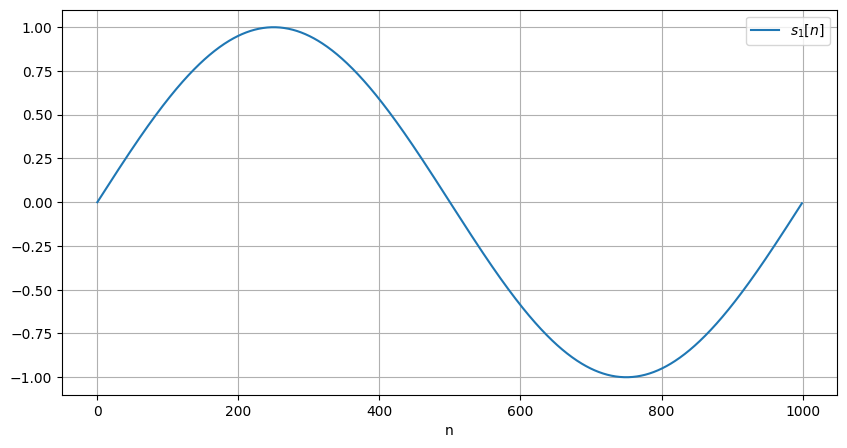

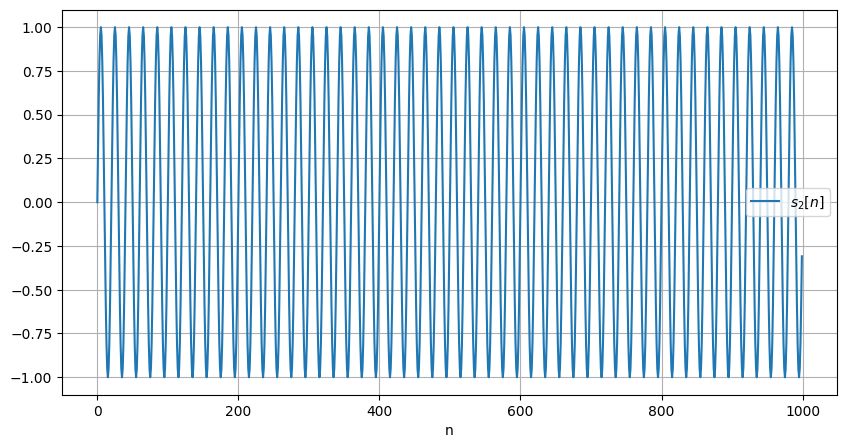

In [27]:
plot_signal(s1, f'$s_{1}[n]$')
plot_signal(s2, f'$s_{2}[n]$')

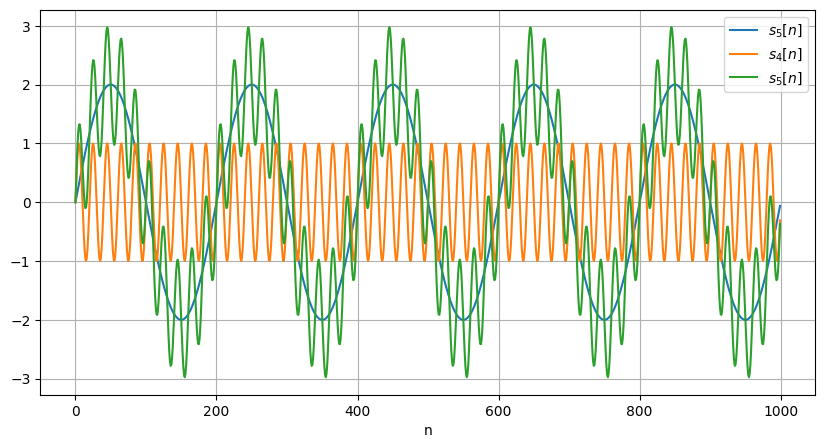

In [28]:
# carry out some operation on signals e.g. addition of two signals for instance
k3, k4 =  5, 50 

s3 = 2 * np.sin(2 * np.pi *k3 /N * n)
s4 = np.sin(2 * np.pi * k4/N * n)

# combine the signals
s5 = s3 + s4 

# plot
plot_signal([s3, s4, s5], ['$s_{5}[n]$', '$s_{4}[n]$', '$s_{5}[n]$'])

Here the Amplitudes `A` differ in the mixture of the signals. It can be seen that the amplitudes of the two signals are added together across `n`.

Implement both DFT and iDFT as functions.

In [29]:
# DFT
def DFT(x):
    """
    input: signal x[n] in time domain
    output: X(f) in frequency domain
    """
    N = len(x)
    
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi/N * k * n)
    
    return X

# Alternative:
# def DFT(x):
#     """
#     input: signal x[n] in time domain
#     output: X(f) in frequency domain
#     """
#     N = len(x)
#     n = np.arange(0,N)
#     F = np.exp(-1j * 2 * np.pi/N * np.outer(n, n))   # hint: use np.outer(n,n) for the basis vectors
#     X = np.dot(F, x)
#     return X


# inverse DFT
def iDFT(X):
    """
    input: signal X(f) in frequency domain
    output: x[n] in time domain
    """
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi/N * k * n)
        x[n] /= N
    return x

# Alternative:
# def iDFT(X):
#     """
#     input: signal X(f) in frequency domain
#     output: x[n] in time domain
#     """
#     N = len(X)
#     n = np.arange(0,N)
#     IF = np.exp(1j* 2* np.pi/N * np.outer(n,n)) /N  # hint: use np.outer(n,n) for the basis vectors
#     return np.dot(IF, X)

In [30]:
# application on signals generated above

S1 = DFT(s1)
S2 = DFT(s2)
S5 = DFT(s5)

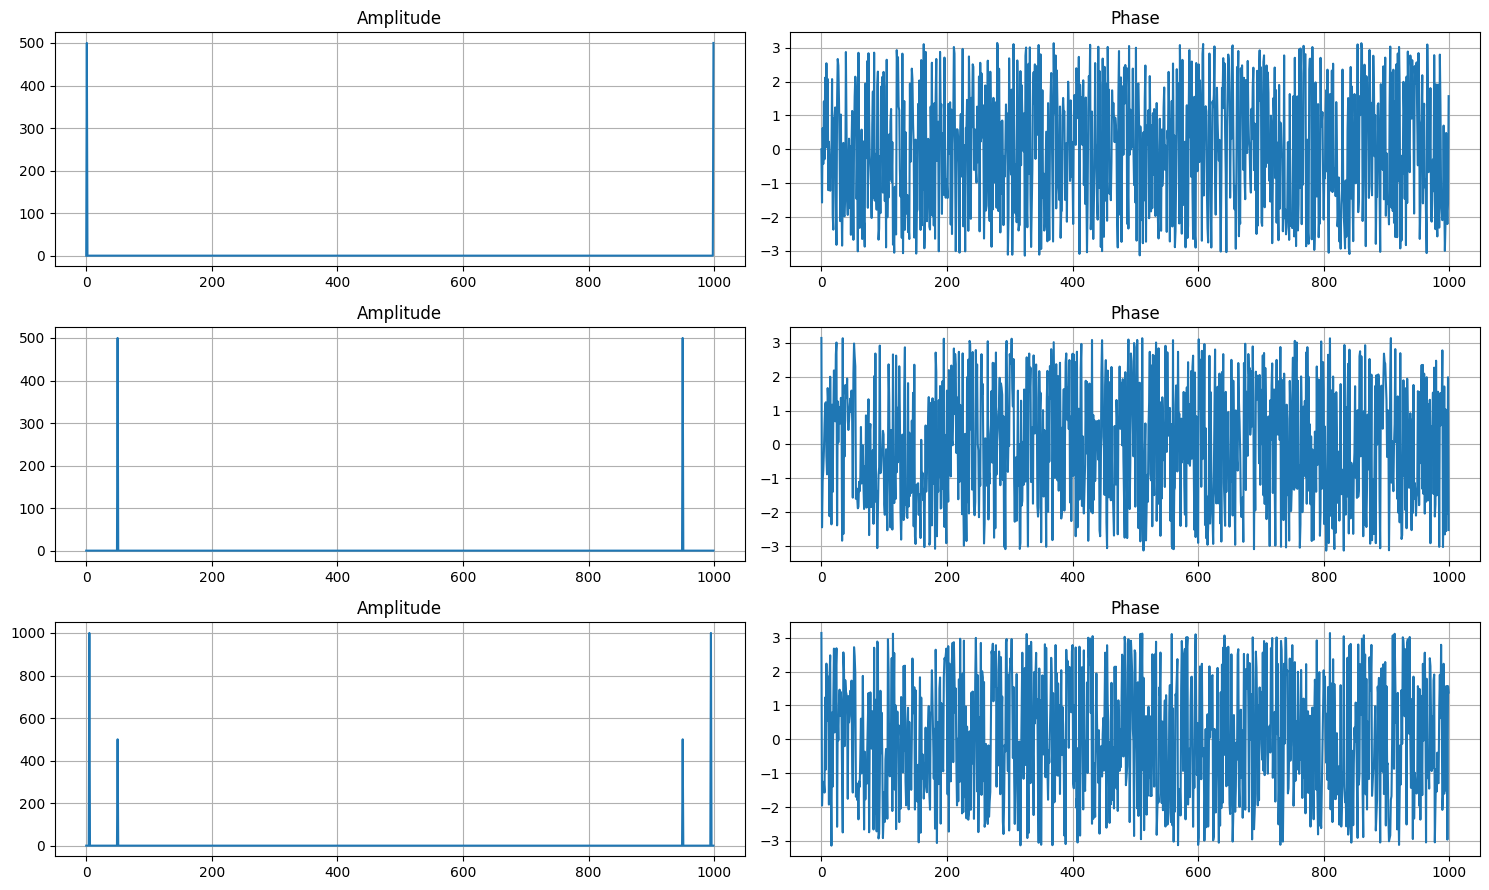

In [31]:
# plots


fig, ax = plt.subplots(3, 2, figsize=(15,9)) # 
ax[0, 0].plot(np.abs(S1))
ax[0, 0].grid()
ax[0, 0].set_title('Amplitude')

ax[0, 1].plot(np.angle(S1))
ax[0, 1].grid()
ax[0, 1].set_title('Phase')


ax[1, 0].plot(np.abs(S2))
ax[1, 0].grid()
ax[1, 0].set_title('Amplitude')

ax[1, 1].plot(np.angle(S2))
ax[1, 1].grid()
ax[1, 1].set_title('Phase')


ax[2, 0].plot(np.abs(S5))
ax[2, 0].grid()
ax[2, 0].set_title('Amplitude')

ax[2, 1].plot(np.angle(S5))
ax[2, 1].grid()
ax[2, 1].set_title('Phase')

plt.tight_layout()

When time domain signal e.g `x[n]`, is converted into frequency domain `X(f)` via DFT, the resulting output is a complex. i.e. it has both amplitude and phase which are two parts of the spectrum of the signal. Oftentimes, signals may have the same amplitude spectrum but a different phase spectrum as in sine and cosine signal.

It is also worth noting, because there are both positive and negative frequencies, the amplitude spectrum is plotted symmetrically and a special function `numpy.fft.fftshift()` should be used. Furthermore, to account for numerical errors, one should set values from the phase plots to 0 where Amplitude < 1e-8.

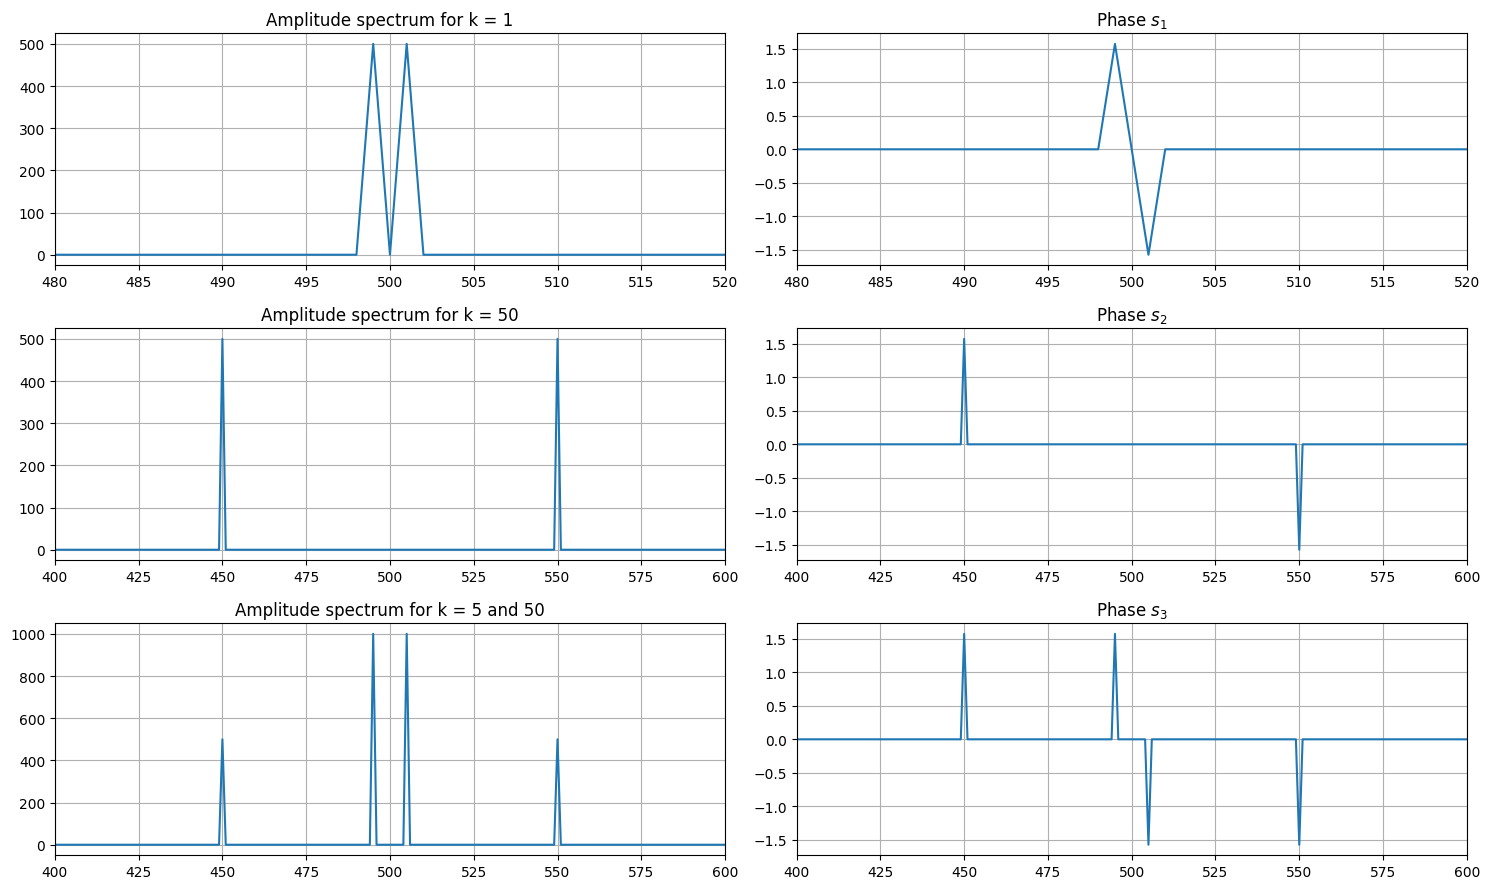

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(15,9))
ax[0,0].plot(np.fft.fftshift(np.abs(S1)))
ax[0,0].grid()
ax[0,0].set_xlim(480,520)
ax[0,0].set_title('Amplitude spectrum for k = 1')

Phase = np.angle(S1)
Phase[np.abs(S1) < 1e-8] = 0
ax[0,1].plot(np.fft.fftshift(Phase))
ax[0,1].grid()
ax[0,1].set_xlim(480,520)
ax[0,1].set_title('Phase $s_{1}$')

ax[1,0].plot(np.fft.fftshift(np.abs(S2)))
ax[1,0].grid()
ax[1,0].set_xlim(400,600)
ax[1,0].set_title('Amplitude spectrum for k = 50')

Phase = np.angle(S2)
Phase[np.abs(S2) < 1e-8] = 0
ax[1,1].plot(np.fft.fftshift(Phase))
ax[1,1].grid()
ax[1,1].set_xlim(400,600)
ax[1,1].set_title('Phase $s_{2}$')

ax[2, 0].plot(np.fft.fftshift(np.abs(S5)))
ax[2, 0].grid()
ax[2, 0].set_xlim(400,600)
ax[2, 0].set_title('Amplitude spectrum for k = 5 and 50')

Phase = np.angle(S5)
Phase[np.abs(S5) < 1e-8] = 0
ax[2, 1].plot(np.fft.fftshift(Phase))
ax[2, 1].grid()
ax[2, 1].set_xlim(400,600)
ax[2, 1].set_title('Phase $s_{3}$')

plt.tight_layout()

One can see that the sine waves all have a phase of pi/2 or -pi/2 (90 degrees). This comes from the mathematical relationship of sine and cosine and how complex exponents are used in the fourier transform. One could calculate this and find out that the only nonzero component of the FFT is where the phase is pi/2 and -pi/2 respectively.

A cosine wave would have phases of 0. As we can write a sine as a cosine shifted by pi/2, this makes sense.

#### We can apply `iDFT()` already implemented above to change back from frequency to time domain.

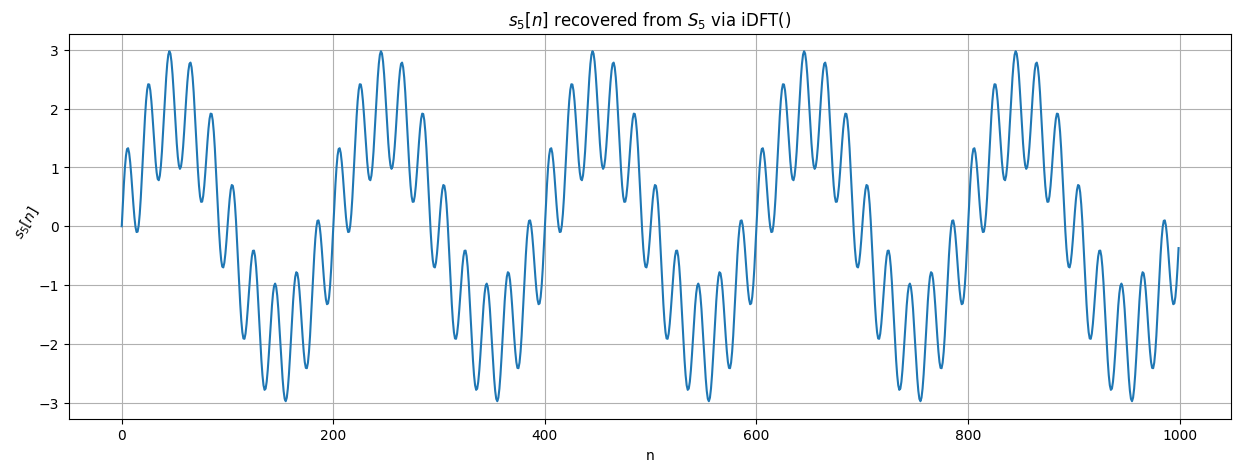

In [33]:
s5_recovered = np.real(iDFT(S5))

# plot

plt.figure(figsize=(15,5))
plt.plot(s5_recovered)
plt.grid()
plt.xlabel('n')
plt.ylabel('$s_{5}[n]$',rotation=60)
plt.title('$s_{5}[n]$ recovered from $S_{5}$ via iDFT()')
plt.show()

### Conclusions

We explored Discrete Fourier Transform (DFT) and convolution theorem. You are encouraged to look out other use cases to cement your understanding of those concepts. Below are some bonus tasks for your practice.

## Bonus tasks

These tasks are given for more hands-on engagement of students. There will be no solutions or grading (i.e., they are only for students to explore for leisure).


1. Show that the convolution operation fulfills the following properties
 - Commutative i.e., $\quad x[n] * h[n] \quad = \quad h[n] * x[n]$ 

 - Associative i.e., $\quad (x_{1}[n] * h[n]) \quad * x_{2}[n] \quad = \quad x_{1}[n] \quad * (h[n] * x_{2}[n])$
 
 - Derrivative i.e., $\quad y[n] = x[n] * h[n]$
 
 $\quad\quad\quad\quad\quad\quad$ $\frac{dy[n]}{dn} \quad = \quad \frac{dx[n]}{dn} * h[n] \quad = \quad x[n] * \frac{dh[n]}{dn} $.



2. Show that convolution in time domain is same as multiplication in frequency domain
 
 $$x[n] * h[n] = iDFT \left( X[k] . H[k] \right)$$
 
 where `x[n]` and `h[n]` and signal `x` and impulse `h` in time domain
 
     and `X[k]` and `H[k]` are the spectral domain of `x` and `h` respectively.


     
3. Let $x[n] = \sum\limits_{k\in \{10, 50, 100, 150, 200\}} \cos(2\pi \frac{k}{N} .n)$ with $n \in [0, 999]$ and sampling frequency $f_s = 500$Hz. 

> Plot $x[n]$, its frequency spectrum $|X(f)|$, and $\angle X(f)$. 